In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units
from astropy import constants as const
import collections, numpy
import matplotlib.lines as mlines
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator

In [41]:
from astropy.io import ascii
from astropy import table
from astropy.table import unique, Table, hstack, Column
import sys
from numpy import inf
import numpy as np
import numpy.ma as ma
import time
from matplotlib.pyplot import figure as fig
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from slugpy.cluster_slug import cluster_slug
from slugpy import * 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [42]:
#Defining Variables and constants

Big_M = (1e8 * const.M_sun.value) #kg
Obj_Radius = 0.1 * const.au.value # m
vi = 2e9 #m/s
xi = 4*const.au.value
ymax = const.au.value  #m
#ypos=np.linspace(0,1,int(N)+1)[1:]*(ymax)


    
dt = 10 # second time step
N = 200 #Number of steps 
P=1 

colors = mpl.cm.get_cmap()(np.linspace(0.0, 1.0, int(N))) # setting colors for data pts


escape_vel= np.sqrt(2*const.G.value * Big_M/xi)
print(f"escape velocity = {escape_vel/1e5:.4e}")
escape_time = xi/(escape_vel * vi)
#print(f"escape time = {time:.4e}")
dt,ymax

escape velocity = 2.1061e+03


(10, 149597870700.0)

In [43]:
#Euler integration for one particle. 
t=0 
x=xi
y=ymax
vx=-vi
vy=0

xpos=np.zeros((N))
ypos=np.zeros((N))
xvel=np.zeros((N))
yvel=np.zeros((N))
xacc=np.zeros((N))
yacc=np.zeros((N))

xpos[0]=xi
ypos[0]=ymax
xvel[0]=-vi
yvel[0]=0

for i in range(N-1):
    A_x = ((-const.G.value*Big_M/((xpos[i]**2+ypos[i]**2)**(3/2)))*xpos[i])
    A_y = ((-const.G.value*Big_M/((xpos[i]**2+ypos[i]**2)**(3/2)))*ypos[i])
    xacc[i]=A_x
    yacc[i]=A_y
    print(A_x, A_y)
    xvel[i+1] = xvel[i] + xacc[i] * dt 
    yvel[i+1] = yvel[i] + yacc[i] * dt
    xpos[i+1] = xpos[i] + xvel[i] * dt 
    ypos[i+1] = ypos[i] + yvel[i] * dt
    



-33841.32970806696 -8460.33242701674
-35998.47283141557 -9310.812908173015
-38360.46411965618 -10277.101734144298
-40952.7741474797 -11379.188867177818
-43804.68088751521 -12641.251407277137
-46949.89782101172 -14092.683816353887
-50427.29979175105 -15769.417831165116
-54281.75211467308 -17715.6226707186
-58565.04043530338 -19985.906643969185
-63336.88318099425 -22648.182243525596
-68665.97962374301 -25787.411507373614
-74630.99530166498 -29510.520505503428
-81321.297287861 -33952.86461244917
-88837.0987136568 -39286.740812886055
-97288.41246804457 -45732.57369338809
-106791.77901952573 -53573.52453647106
-117463.01372368606 -63174.32478142907
-129403.05060960898 -75004.96724965339
-142672.117866419 -89669.17676337354
-157244.7206516734 -107935.66017406914
-172934.1512443177 -130765.71905954287
-189271.15330381852 -159321.6245658199
-205319.77108997674 -194922.78051705507
-219422.34296528652 -238887.76999713588
-228902.85366665258 -292162.4108381061
-229852.42668600136 -354611.97182662

In [44]:
xpos_e=xpos
ypos_e=ypos

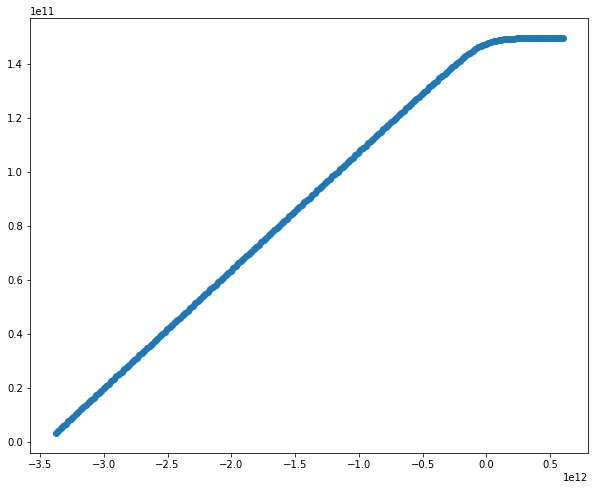

In [45]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(xpos_e,ypos_e)
#ax.set_xlim(-0.2e13,0.1e13)

In [46]:
#Leapfrog for one particle
t=0 
x=xi
y=ymax
vx=-vi
vy=0

xpos=np.zeros((N))
ypos=np.zeros((N))
xvel=np.zeros((N))
yvel=np.zeros((N))
xacc=np.zeros((N))
yacc=np.zeros((N))

xpos[0]=xi
ypos[0]=ymax
xvel[0]=-vi
yvel[0]=0
xacc[0]=((-const.G.value*Big_M/((xpos[0]**2+ypos[0]**2)**(3/2)))*xpos[0])
yacc[0]=((-const.G.value*Big_M/((xpos[0]**2+ypos[0]**2)**(3/2)))*ypos[0])
for i in range(N-1):
    
    xpos[i+1] = xpos[i] + xvel[i] *dt + 0.5*(xacc[i])*dt**2 
    ypos[i+1] = ypos[i] + yvel[i] *dt + 0.5*(yacc[i])*dt**2
    
    xacc[i+1] = ((-const.G.value*Big_M/((xpos[i+1]**2+ypos[i+1]**2)**(3/2)))*xpos[i+1])
    yacc[i+1] = ((-const.G.value*Big_M/((xpos[i+1]**2+ypos[i+1]**2)**(3/2)))*ypos[i+1])
    
    print(i+1,xacc[i+1])
    
    #print(xacc[i],xacc[i+1])
    xvel[i+1] = xvel[i] + 0.5*(xacc[i] + xacc[i+1]) * dt 
    yvel[i+1] = yvel[i] + 0.5*(yacc[i] + yacc[i+1]) * dt

    



1 -35998.682795073386
2 -38360.95701795878
3 -40953.64445672379
4 -43806.05110460066
5 -46951.927094216844
6 -50430.19540570836
7 -54285.78484171231
8 -58570.56514248101
9 -63344.36660011724
10 -68676.03789679772
11 -74644.44485815993
12 -81339.2238377688
13 -88860.95064953635
14 -97320.1266289494
15 -106833.9481089474
16 -117519.10445214274
17 -129477.6769170258
18 -142771.35791256092
19 -157376.42622893277
20 -173108.1077965711
21 -189498.7620360187
22 -205612.5757785602
23 -219788.16353633633
24 -229337.6383291197
25 -230325.89716205987
26 -217727.43047457925
27 -186438.0103196326
28 -133498.2733991392
29 -60989.65321729491
30 22429.93097176416
31 103630.06666836167
32 170294.92040918907
33 215638.63569385043
34 239400.60675133867
35 245627.77905656275
36 239760.3220956809
37 226705.83563492075
38 210111.31619647093
39 192368.31090078587
40 174896.08597419408
41 158452.5439865296
42 143381.69238429784
43 129784.93291184538
44 117630.6225716922
45 106820.54803908017
46 97228.57177932

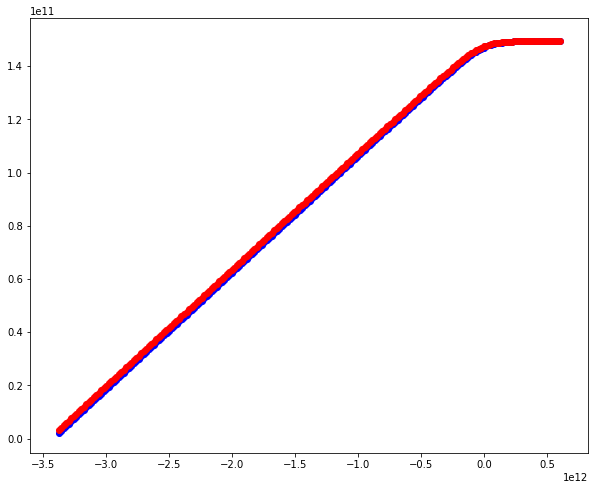

In [47]:
fig, ax = plt.subplots(figsize=[10,8])

ax.scatter(xpos,ypos,color='blue')
ax.scatter(xpos_e,ypos_e,color='red')
#ax.set_xlim(-0.2e13,0.1e13);

In [48]:
#defining my motion functions in order to place inside leapfrog function for loop
def Position(x,vx,ax,dt):
    x = x + vx * dt + 0.5*(ax)*dt**2
    return x

def Acceleration(xpos,ypos):
    a = ((-const.G.value*Big_M/((xpos**2+ypos**2)**(3/2))))
    return a

def Velocity(vx,ax,ax_1,dt):
    vx = vx + 0.5*(ax + ax_1)*dt
    return vx
    

In [49]:
#Leapfrog for 10 particles using functions for Acceleration, Velocity, and Position

t = 0 
p = 10
x = np.ones(p)*xi
y = np.linspace(0,1,int(p)+1)[1:]*(ymax)
vx = np.ones(p)*(-vi)
vy = np.zeros(p)


Xpos=np.zeros((p,N))
Ypos=np.zeros((p,N))
Xvel=np.zeros((p,N))
Yvel=np.zeros((p,N))
Xacc=np.zeros((p,N))
Yacc=np.zeros((p,N))

Xpos[:,0]=x
Ypos[:,0]=y
Xvel[:,0]=vx
Yvel[:,0]=vy
Xacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Xpos[:,0])
Yacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Ypos[:,0])
for i in range(N-1):
    for j in range(p):
        
        Xpos[j,i+1] = Position(Xpos[j,i],Xvel[j,i],Xacc[j,i],dt)
        Ypos[j,i+1] = Position(Ypos[j,i],Yvel[j,i],Yacc[j,i],dt) 
    
        #print(Xpos) #The x pos at this point is giving iterating up to N=1
        acc = Acceleration(Xpos[j,i+1],Ypos[j,i+1])
        Xacc[j,i+1] = acc*Xpos[j,i+1]
        Yacc[j,i+1] = acc*Ypos[j,i+1]
        
        #print(Xacc[i],Xacc[i+1])
        Xvel[j,i+1] = Velocity(Xvel[j,i],Xacc[j,i],Xacc[j,i+1],dt) 
        Yvel[j,i+1] = Velocity(Yvel[j,i],Yacc[j,i],Yacc[j,i+1],dt)


    



In [50]:
#Leapfrog for 10 particle DUPLICATE not using second for loop

t = 0 
p = 10
x = np.ones(p)*xi
y = np.linspace(0,1,int(p)+1)[1:]*(ymax)
vx = np.ones(p)*(-vi)
vy = np.zeros(p)


Xpos=np.zeros((p,N))
Ypos=np.zeros((p,N))
Xvel=np.zeros((p,N))
Yvel=np.zeros((p,N))
Xacc=np.zeros((p,N))
Yacc=np.zeros((p,N))

Xpos[:,0]=x
Ypos[:,0]=y
Xvel[:,0]=vx
Yvel[:,0]=vy
Xacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Xpos[:,0])
Yacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Ypos[:,0])
for i in range(N-1):
    #for j in range(p):
        
    Xpos[:,i+1] = Position(Xpos[:,i],Xvel[:,i],Xacc[:,i],dt)
        #Xpos[j,i+1] = Xpos[j,i] + Xvel[j,i] *dt + 0.5*(Xacc[j,i])*dt**2 
    Ypos[:,i+1] = Position(Ypos[:,i],Yvel[:,i],Yacc[:,i],dt) 
    
        #print(Xpos) #The x pos at this point is giving iterating up to N=1
    Acc=Acceleration(Xpos[:,i+1],Ypos[:,i+1]) 
    Xacc[:,i+1] = Acc*Xpos[:,i+1]
    Yacc[:,i+1] = Acc*Ypos[:,i+1]
 
    Xvel[:,i+1] = Velocity(Xvel[:,i],Xacc[:,i],Xacc[:,i+1],dt)
    Yvel[:,i+1] = Velocity(Yvel[:,i],Yacc[:,i],Yacc[:,i+1],dt)
        #we can do vels for every particle at one time


    



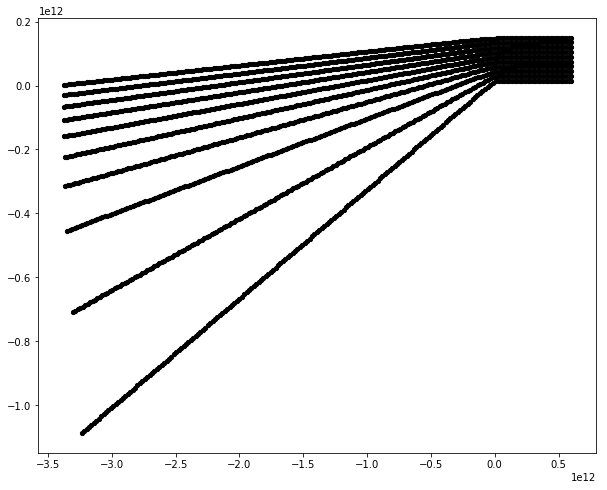

In [51]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(Xpos,Ypos,s=18,color='black',label='leapfrog')


In [69]:
#Leapfrog for 10 particle DUPLICATE not using second for loop and using a functio for the entire calculation. 
def leapfrog(xi,ymax,vi,N,P,dt):

    x = np.ones(p)*xi
    y = np.linspace(0,1,int(p)+1)[1:]*(ymax)
    vx = np.ones(p)*(-vi)
    vy = np.zeros(p)


    Xpos=np.zeros((p,N))
    Ypos=np.zeros((p,N))
    Xvel=np.zeros((p,N))
    Yvel=np.zeros((p,N))
    Xacc=np.zeros((p,N))
    Yacc=np.zeros((p,N))

    Xpos[:,0]=x
    Ypos[:,0]=y
    Xvel[:,0]=vx
    Yvel[:,0]=vy
    Xacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Xpos[:,0])
    Yacc[:,0]=((-const.G.value*Big_M/((Xpos[:,0]**2+Ypos[:,0]**2)**(3/2)))*Ypos[:,0])
    for i in range(N-1):
        #for j in range(p):

        Xpos[:,i+1] = Position(Xpos[:,i],Xvel[:,i],Xacc[:,i],dt)
            #Xpos[j,i+1] = Xpos[j,i] + Xvel[j,i] *dt + 0.5*(Xacc[j,i])*dt**2 
        Ypos[:,i+1] = Position(Ypos[:,i],Yvel[:,i],Yacc[:,i],dt) 

            #print(Xpos) #The x pos at this point is giving iterating up to N=1

        Acc=Acceleration(Xpos[:,i+1],Ypos[:,i+1]) 
        Xacc[:,i+1] = Acc*Xpos[:,i+1]
        Yacc[:,i+1] = Acc*Ypos[:,i+1]

        Xvel[:,i+1] = Velocity(Xvel[:,i],Xacc[:,i],Xacc[:,i+1],dt)
        Yvel[:,i+1] = Velocity(Yvel[:,i],Yacc[:,i],Yacc[:,i+1],dt)
            #we can do vels for every particle at one time
        
    return Xpos, Ypos, Xvel, Yvel, Xacc, Yacc
    


In [70]:
Xpos, Ypos, Xvel, Yvel, Xacc, Yacc=leapfrog(xi,ymax,vi,50,7,10)

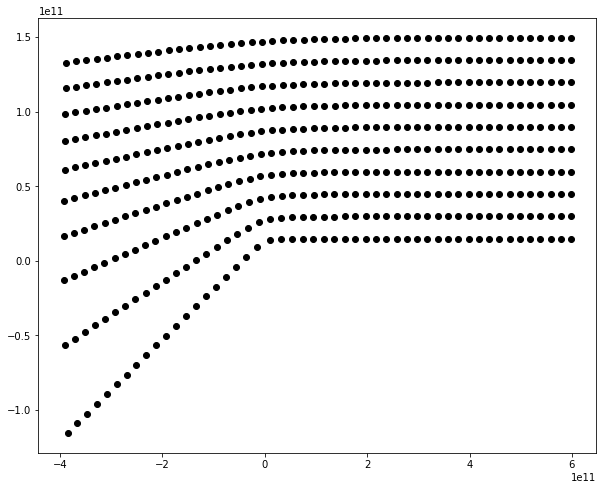

In [54]:
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(Xpos,Ypos,color='black',label='leapfrog')

In [71]:
#defining velocity and position functions that will be used in the euler function below
def vel(vx,x_acc,dt):
    vx=vx+x_acc*dt
    return vx

def pos(x,vx,dt):
    x=x+vx*dt
    return x

In [72]:
#Rewriting Euler integration in a function format and using array operations in one for loop

def euler(xi,ymax,vi,N,p,dt):
    vy = np.zeros(p)
    vx = np.ones(p)*(-vi)
    y=np.linspace(0,1,int(p)+1)[1:]*(ymax)
    x = np.ones(p)*xi

    Time_e = np.zeros((p,N))     
    Xpos_e = np.zeros((p,N))
    Ypos_e = np.zeros((p,N))
    Yvel_e = np.zeros((p,N))
    Xvel_e = np.zeros((p,N))
    Xacc_e=np.zeros((p,N))
    Yacc_e=np.zeros((p,N))

    Xpos_e[:,0]=x
    Ypos_e[:,0]=y
    Xvel_e[:,0]=vx
    Yvel_e[:,0]=vy
    Xacc_e[:,0]=((-const.G.value*Big_M/((Xpos_e[:,0]**2+Ypos_e[:,0]**2)**(3/2)))*Xpos_e[:,0])
    Yacc_e[:,0]=((-const.G.value*Big_M/((Xpos_e[:,0]**2+Ypos_e[:,0]**2)**(3/2)))*Ypos_e[:,0])

    for i in range(N-1): #Avoid square arrays!!!
        #print("i=", i)
        Xacc_e[:,i+1] = Acceleration(Xpos_e[:,i],Ypos_e[:,i])*Xpos_e[:,i]
        Yacc_e[:,i+1] = Acceleration(Xpos_e[:,i],Ypos_e[:,i])*Ypos_e[:,i]
        Xvel_e[:,i+1] = vel(Xvel_e[:,i],Xacc_e[:,i],dt)
        Yvel_e[:,i+1] = vel(Yvel_e[:,i],Yacc_e[:,i],dt)
        Xpos_e[:,i+1] = pos(Xpos_e[:,i],Xvel_e[:,i],dt)
        Ypos_e[:,i+1] = pos(Ypos_e[:,i],Yvel_e[:,i],dt)

    return Xpos_e,Ypos_e,Xvel_e,Yvel_e,Xacc_e,Yacc_e


In [57]:
Xpos_e,Ypos_e,Xvel_e,Yvel_e,Xacc_e,Yacc_e=euler(xi,ymax,vi,50,7,10)

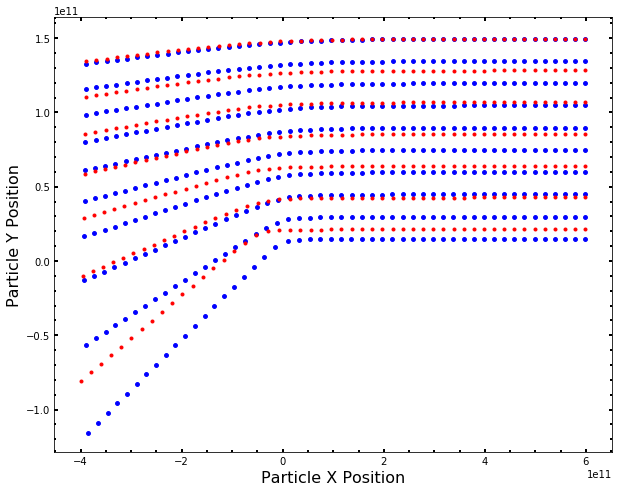

In [58]:
#plotting both euler and leapfrog positions at same initial conditions to see difference in integrator methods.
#parameters used in this plot are : N=50 , p=7, dt=10
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(Xpos,Ypos,color='blue',s=15,label='leapfrog')
ax.scatter(Xpos_e,Ypos_e,color='red',s=9,label='leapfrog')
ax.set_xlabel('Particle X Position',fontsize=16)
ax.set_ylabel('Particle Y Position',fontsize=16)
ax.tick_params(which='both', direction='in',width=2)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both');

In [105]:
Xpos, Ypos, Xvel, Yvel, Xacc, Yacc=leapfrog(xi,ymax,vi,30,7,20)

In [104]:
Xpos_e,Ypos_e,Xvel_e,Yvel_e,Xacc_e,Yacc_e=euler(xi,ymax,vi,30,7,20)

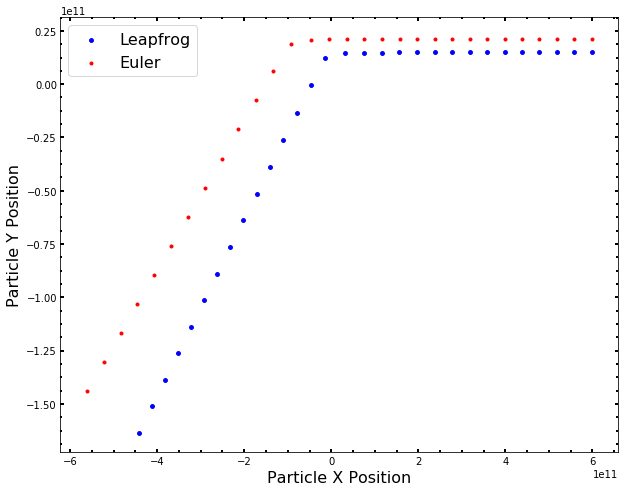

In [106]:
#plotting both euler and leapfrog positions at same initial conditions to see difference in integrator methods.
#parameters used in this plot are : N=500 , p=7, dt=3
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(Xpos[0],Ypos[0],color='blue',s=15,label='Leapfrog')
ax.scatter(Xpos_e[0],Ypos_e[0],color='red',s=9,label='Euler')
ax.legend(fontsize=16)
ax.set_xlabel('Particle X Position',fontsize=16)
ax.set_ylabel('Particle Y Position',fontsize=16)
ax.tick_params(which='both', direction='in',width=2)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both');

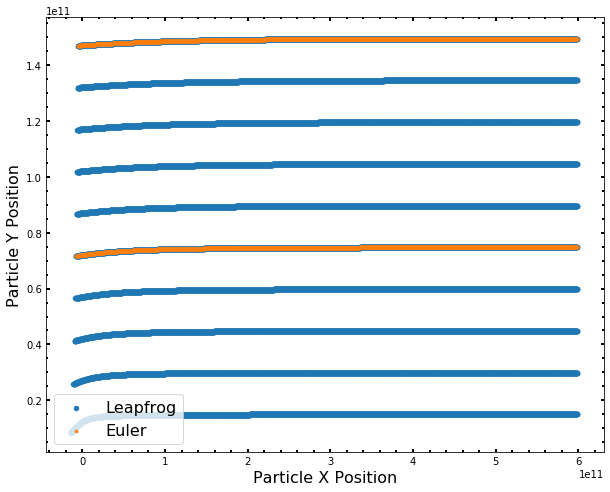

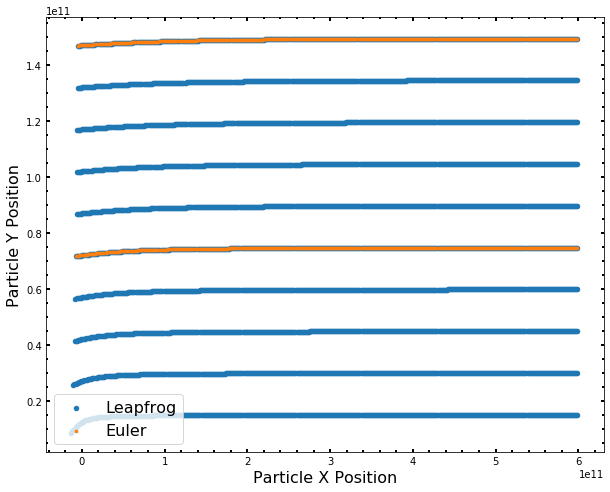

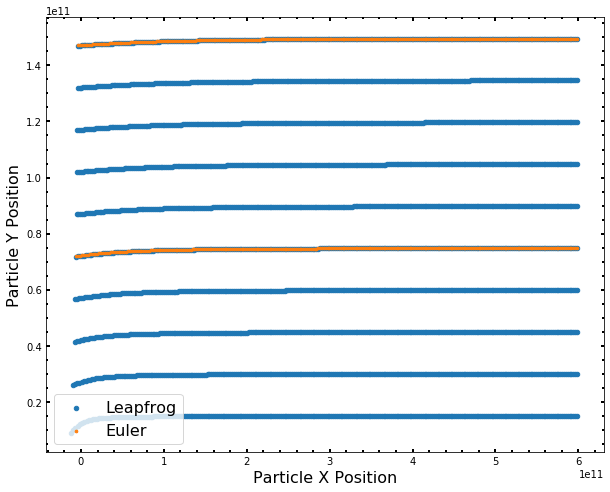

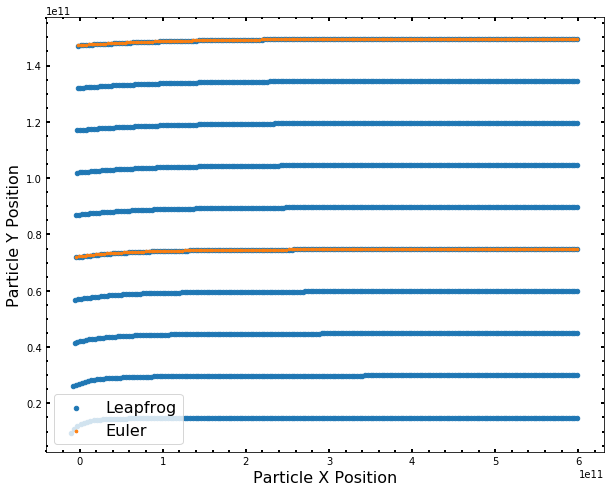

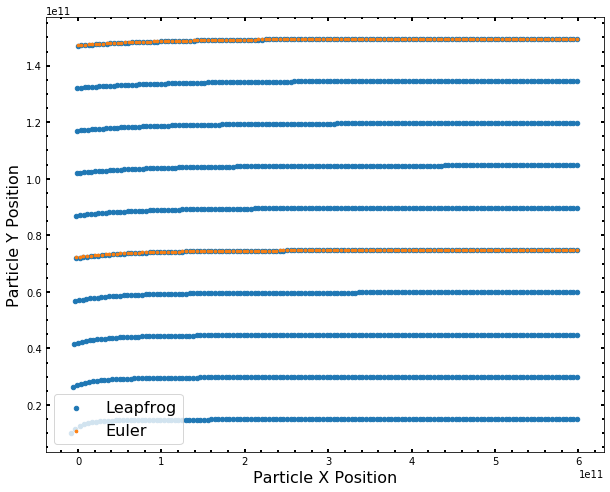

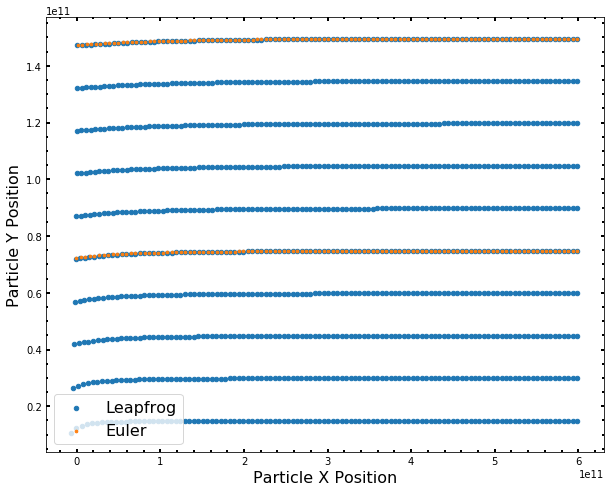

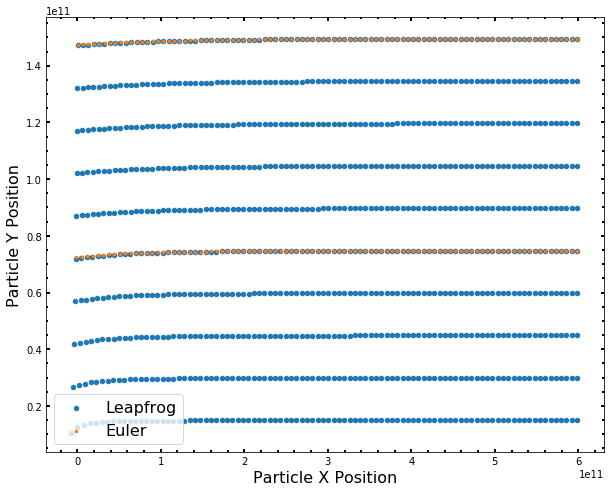

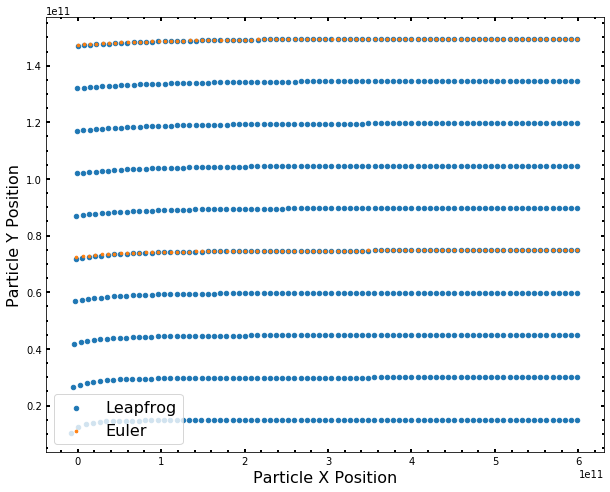

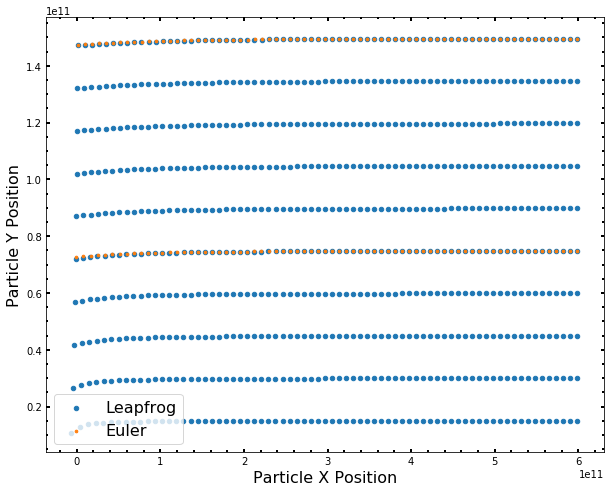

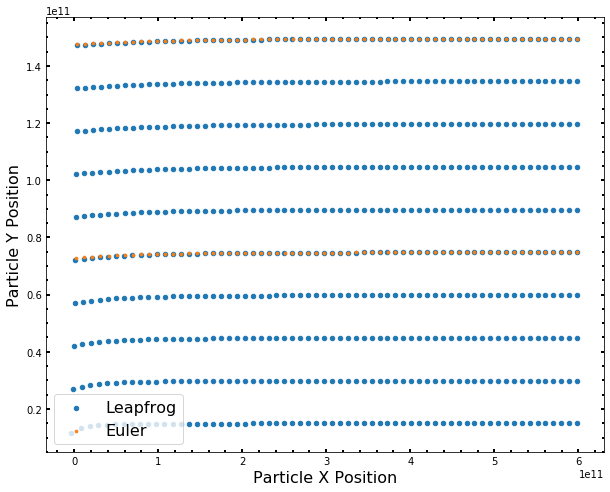

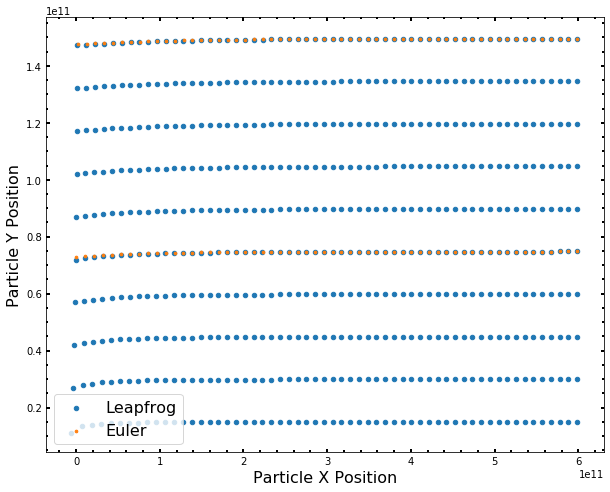

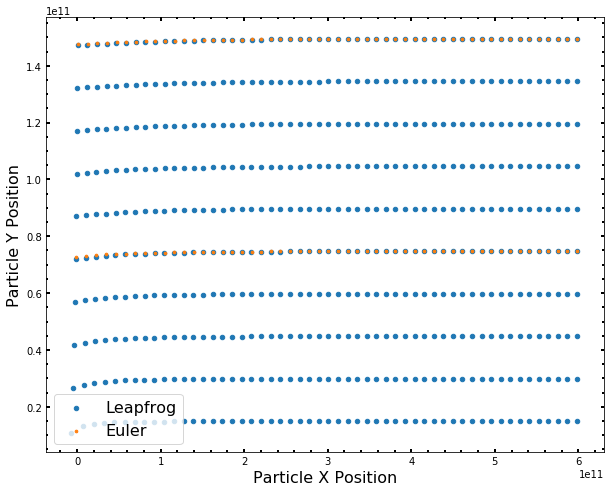

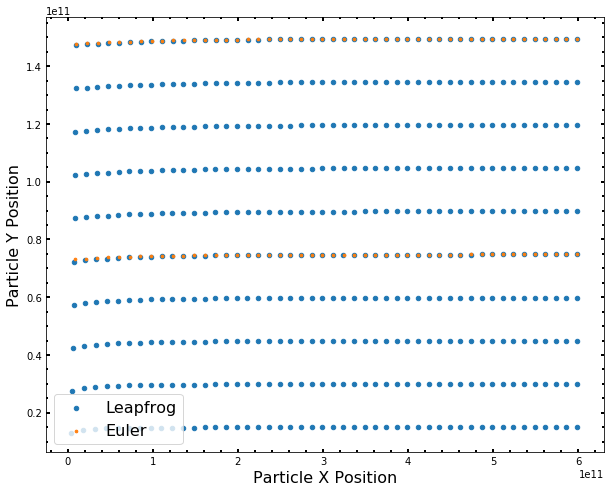

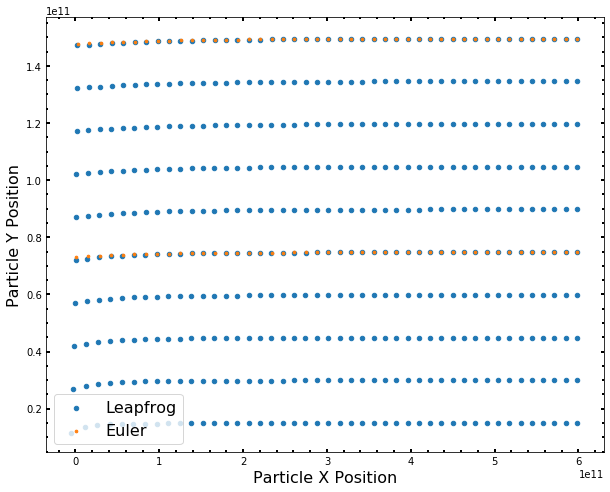

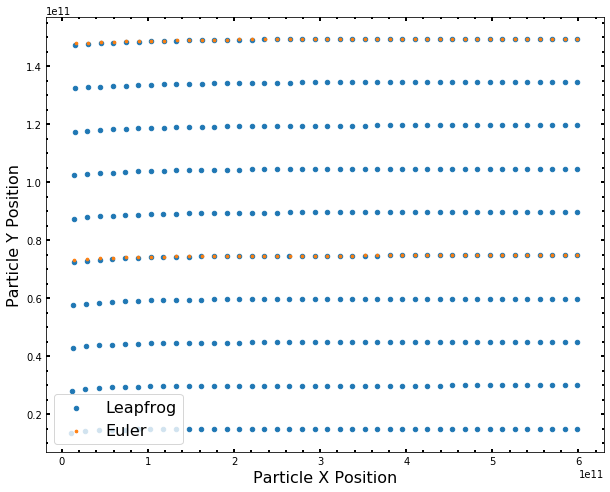

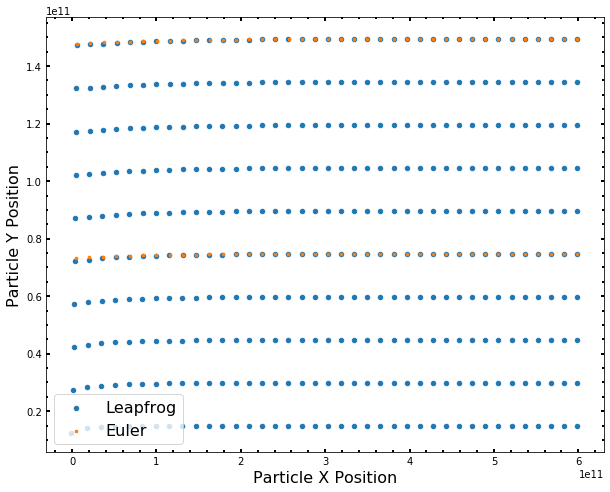

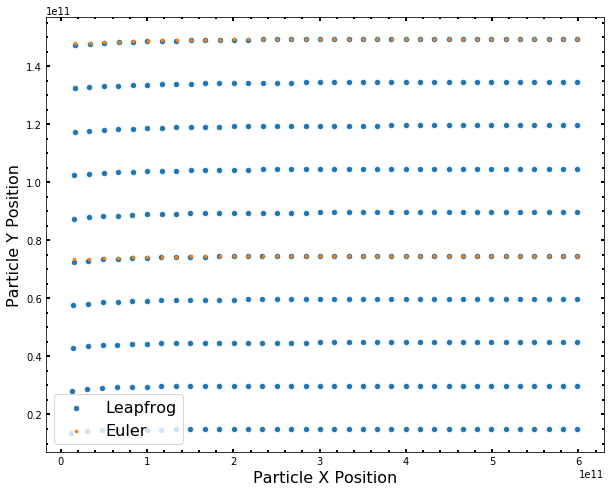

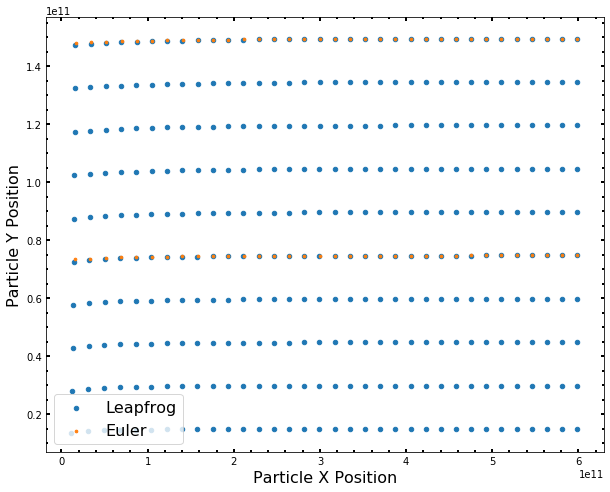

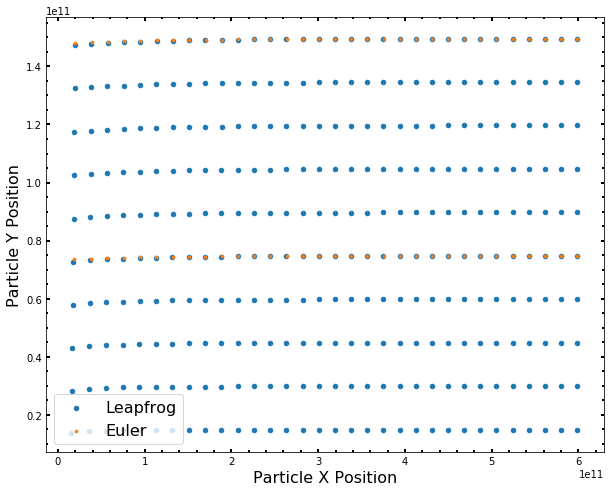

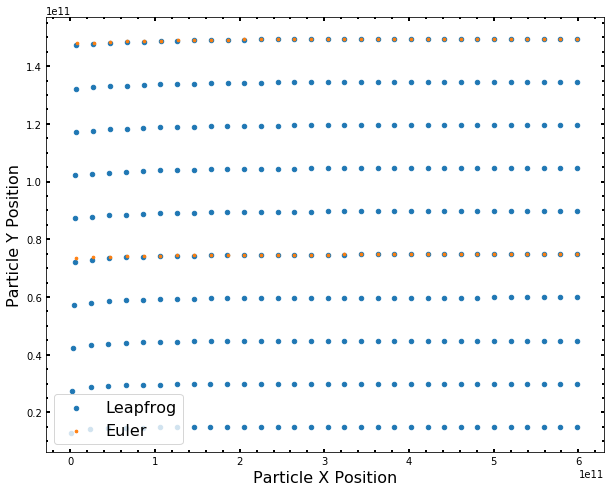

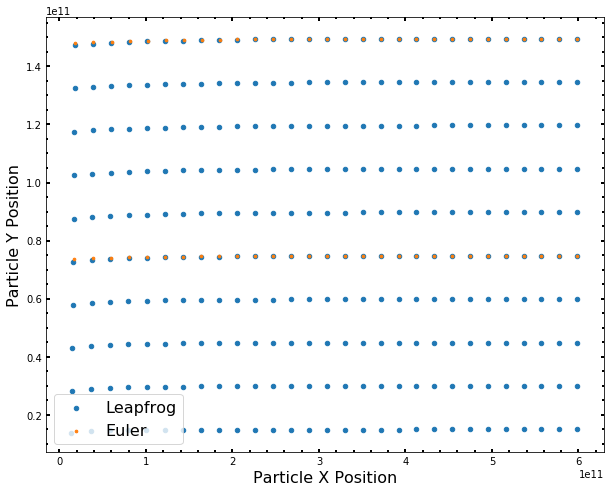

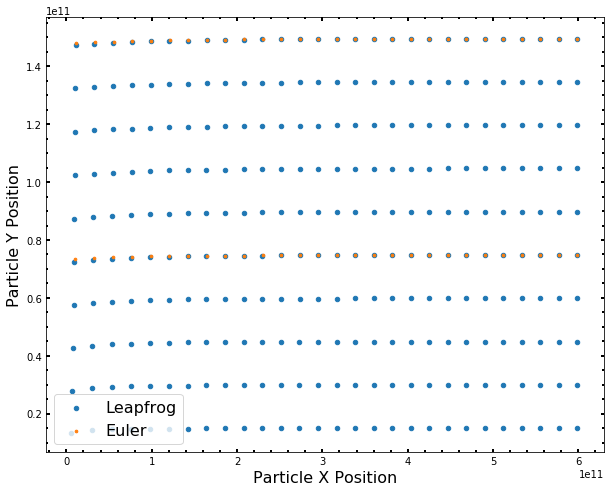

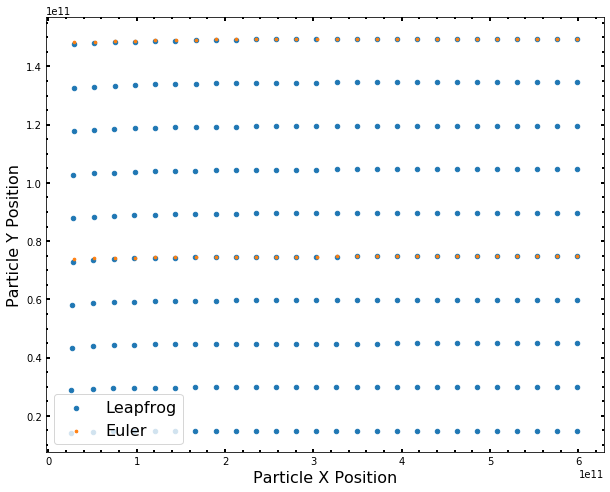

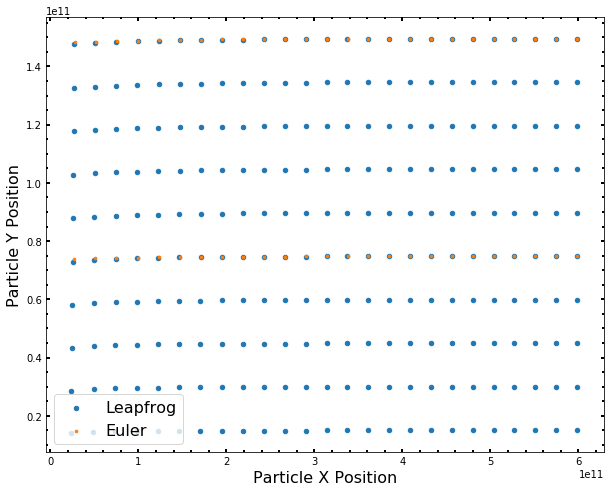

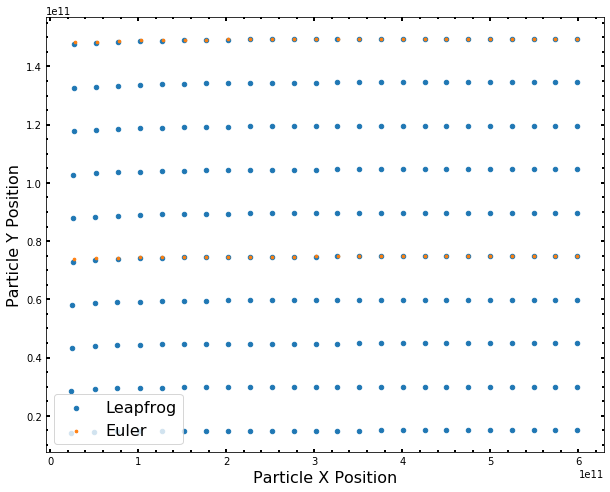

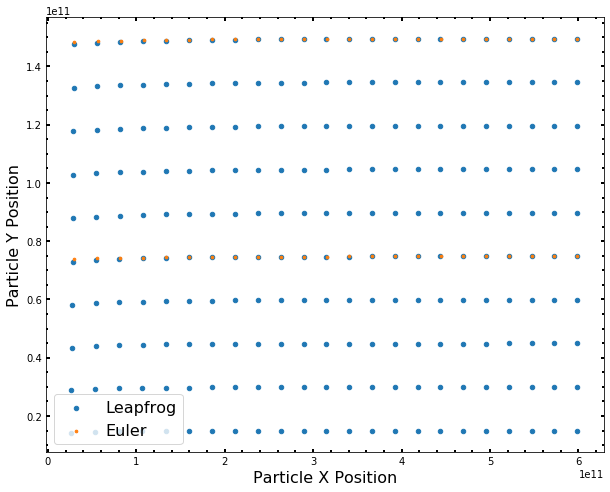

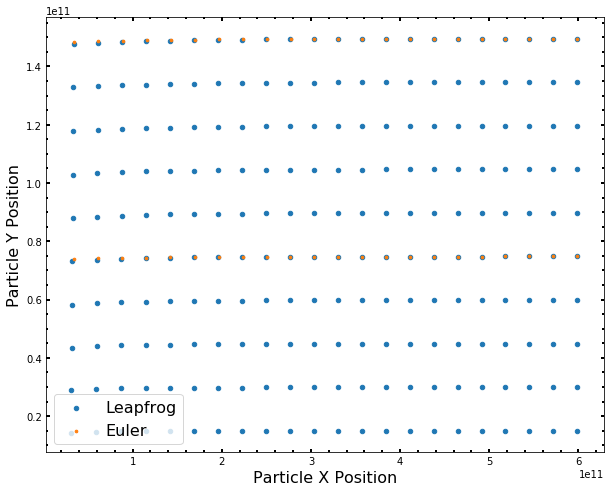

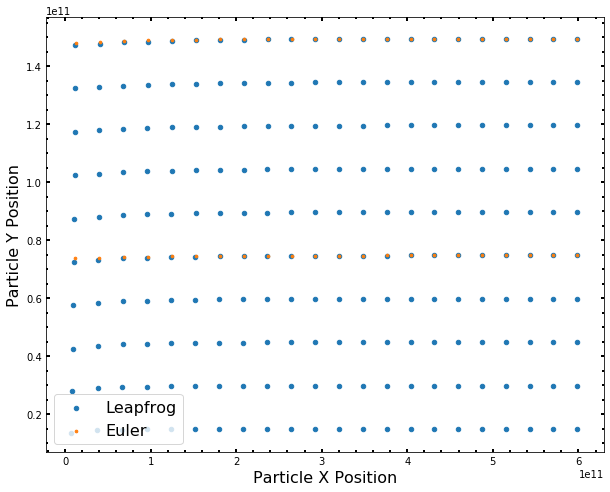

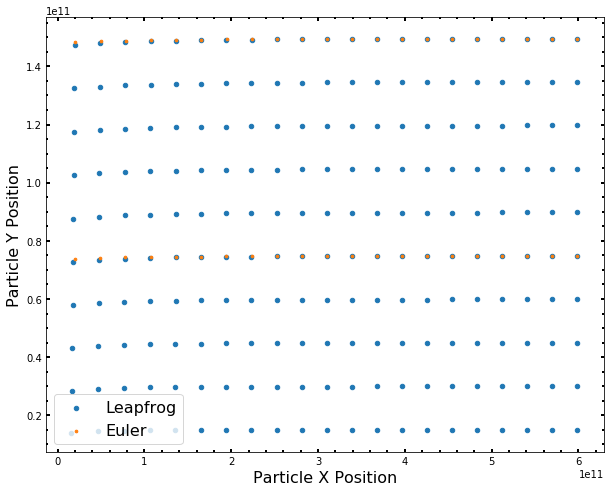

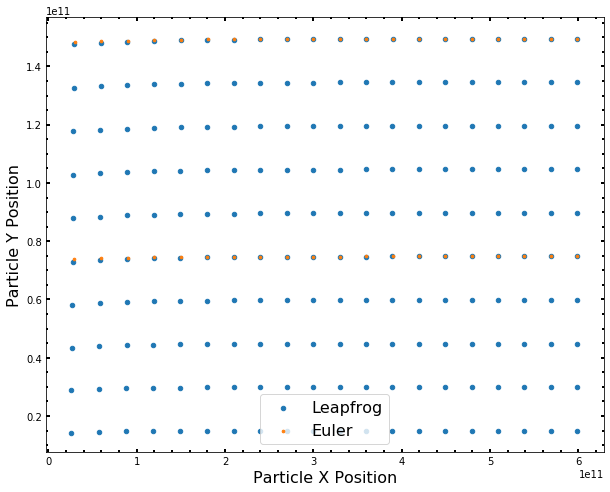

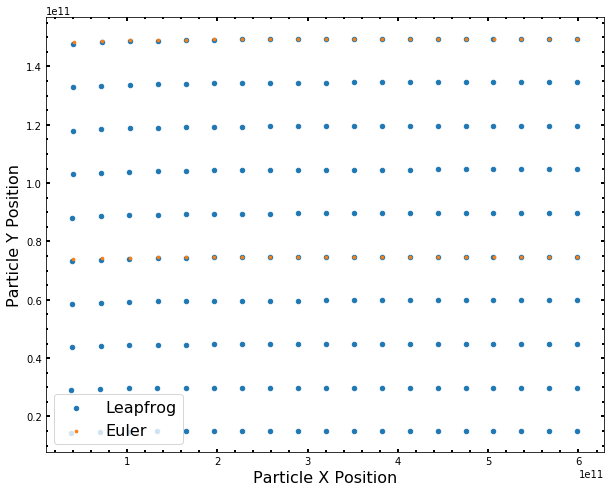

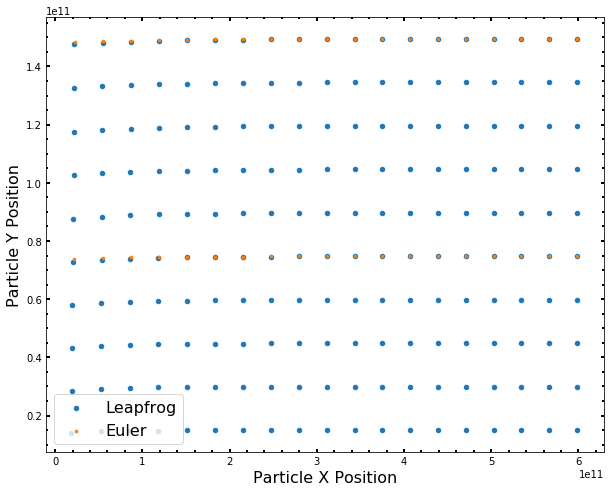

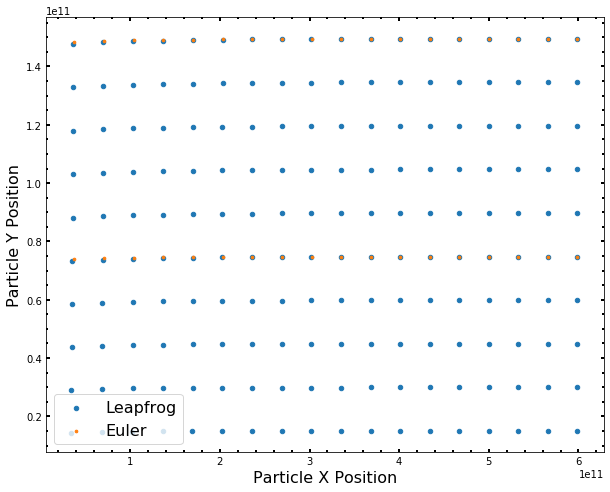

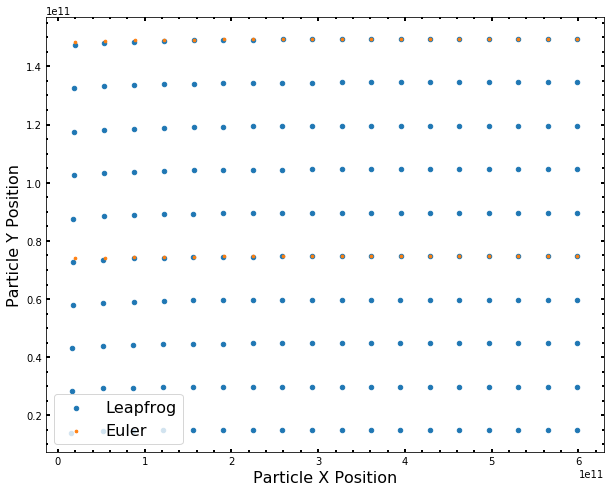

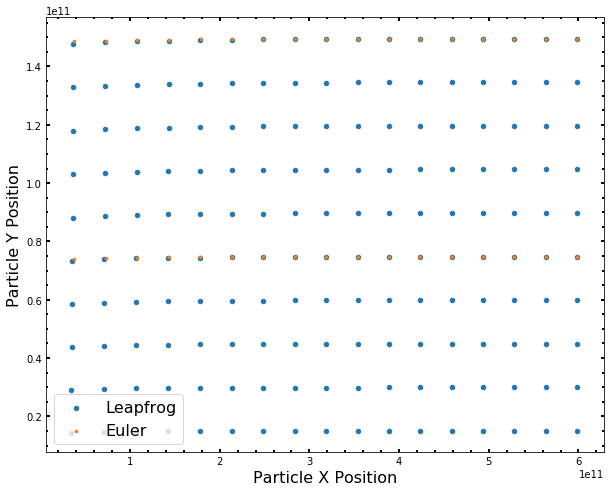

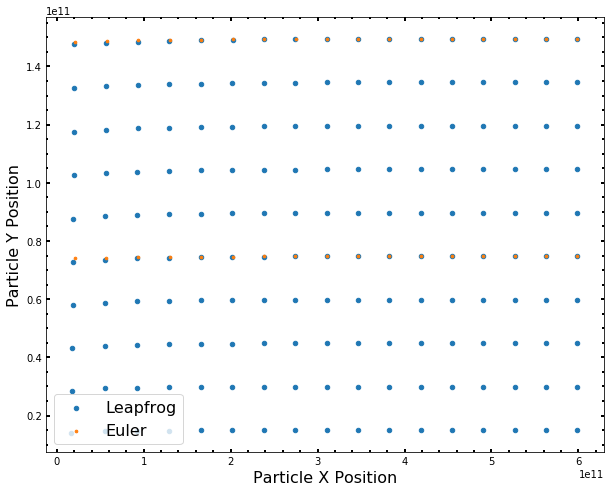

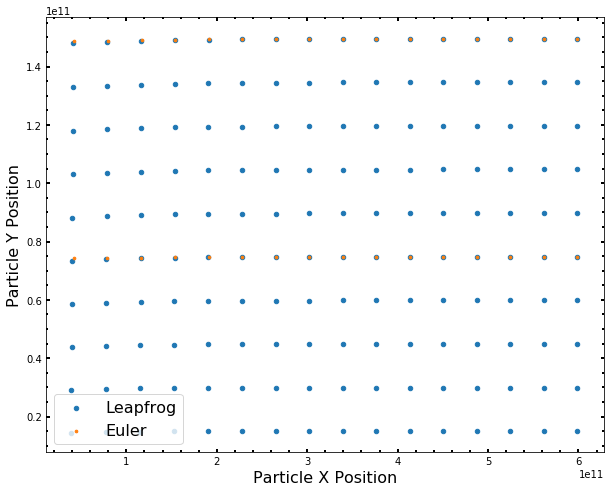

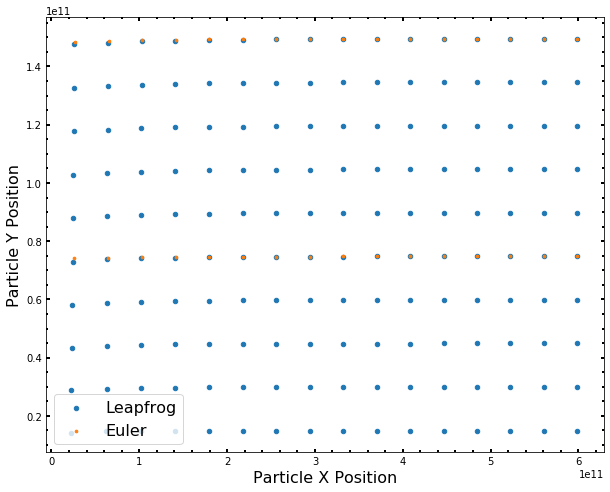

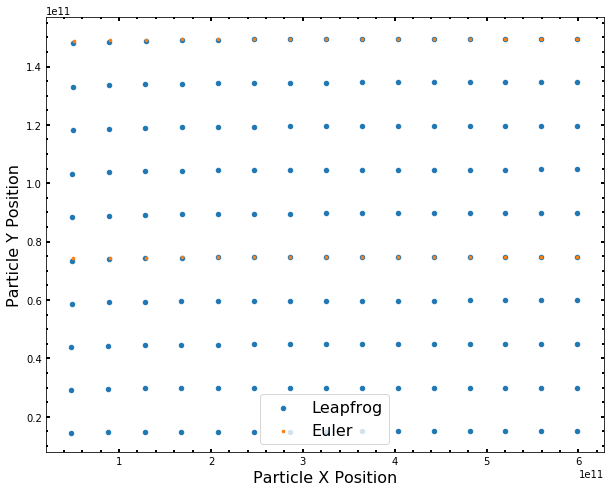

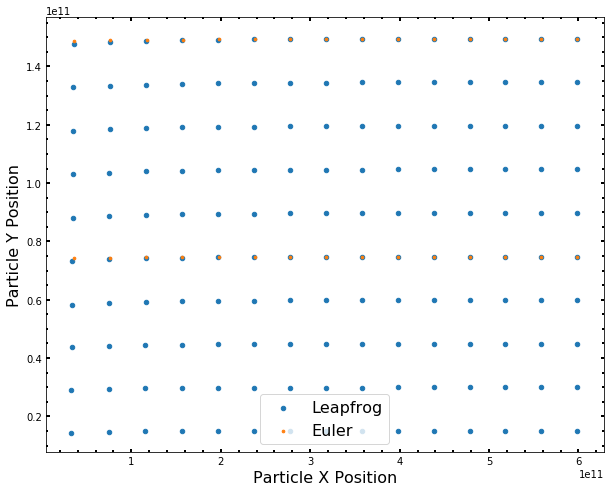

In [108]:
dts=np.linspace(0.1,20,40) #array of dts
time=300 #variable for how long the simulation will run for 

for i in range(len(dts)): 
    Nsteps=time/dts[i]
    Nsteps=int(np.round(Nsteps))
    xpos,ypos,xvel,yvel,xacc,yacc=leapfrog(xi,ymax,vi,Nsteps,2,dts[i])
    xpos_e,ypos_e,xvel_e,yvel_e,xacc_e,yacc_e=euler(xi,ymax,vi,Nsteps,2,dts[i])
    #print(xpos)
    fig, ax = plt.subplots(figsize=[10,8])
    ax.scatter(xpos,ypos,s=20,label='Leapfrog')
    ax.scatter(xpos_e,ypos_e,s=7,label='Euler')
    ax.legend(fontsize=16)
    ax.set_xlabel('Particle X Position',fontsize=16)
    ax.set_ylabel('Particle Y Position',fontsize=16)
    ax.tick_params(which='both', direction='in',width=2)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')




In [281]:
colors = mpl.cm.get_cmap()(np.linspace(0, 1, int(40))) # setting colors for data pts


In [37]:
colors1 = mpl.cm.jet(np.linspace(0,1,40))
colors2 = mpl.cm.jet(np.linspace(0,1,40))

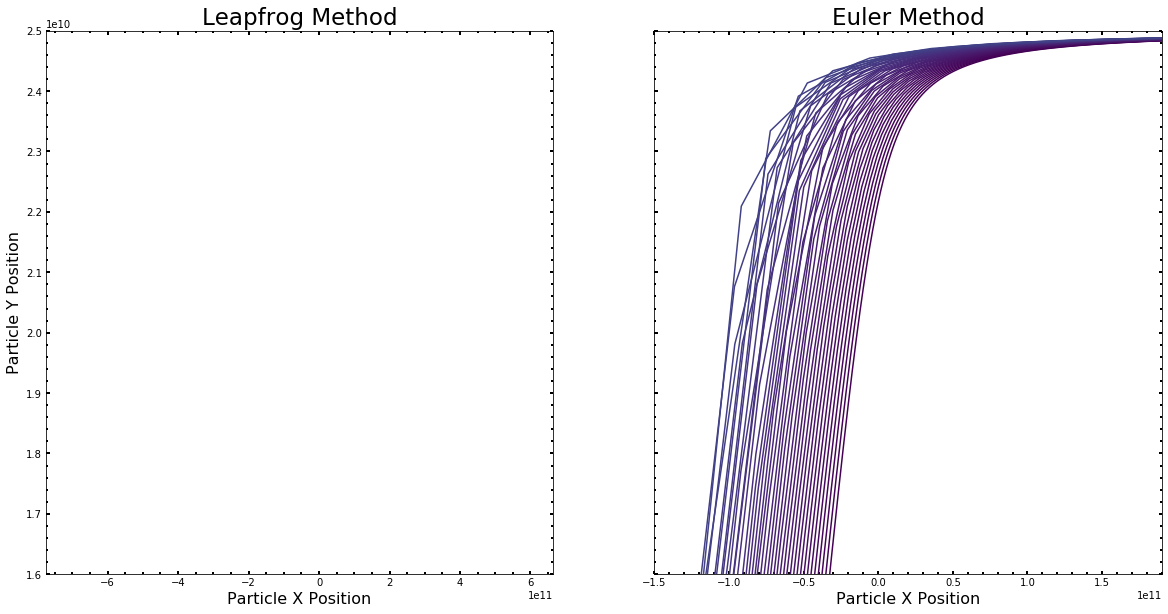

In [39]:
dts=np.linspace(0.1,20,40) #array of dts
time=600 #variable for how long the simulation will run for 
fig, ax = plt.subplots(1,2,figsize=[20,10], sharey=True)
for i in range(len(dts)): 
    Nsteps=time/dts[i]
    Nsteps=int(np.round(Nsteps))
    xpos,ypos,xvel,yvel,xacc,yacc=leapfrog(xi,ymax,vi,Nsteps,6,dts[i])
    xpos_e,ypos_e,xvel_e,yvel_e,xacc_e,yacc_e=euler(xi,ymax,vi,Nsteps,6,dts[i])

    
    ax[0].plot(xpos[0],ypos[0],label='Leapfrog',color=colors[i])
    ax[0].set_xlabel('Particle X Position',fontsize=16)
    ax[0].tick_params(which='both', direction='in',width=2)
    #ax[0].set_xlim(-0.5e11,1.3e11)
    #ax[0].set_ylim(1.8e10,0.25e11)
    ax[0].yaxis.set_minor_locator(AutoMinorLocator())
    ax[0].xaxis.set_minor_locator(AutoMinorLocator())
    ax[0].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[0].set_ylabel('Particle Y Position',fontsize=16)
    ax[0].set_title('Leapfrog Method', fontsize=23)

    ax[1].plot(xpos_e[0],ypos_e[0],label='$\Delta$t',color=colors[i])
    ax[1].set_xlabel('Particle X Position',fontsize=16)
    ax[1].tick_params(which='both', direction='in',width=2)
    ax[1].set_xlim(-1.5e11,1.9e11)
    ax[1].set_ylim(1.6e10,0.25e11)
    ax[1].yaxis.set_minor_locator(AutoMinorLocator())
    ax[1].xaxis.set_minor_locator(AutoMinorLocator())
    ax[1].yaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
    ax[1].set_title('Euler Method', fontsize=23)




# Plotting energy and angular momentum comparisons between Leapfrog and Euler methods

In [403]:
#Defining equation for the Total energy of each particle for 
#We use the specific kinetic and potential energy equations FOR LEAPFROG INTEGRATION METHOD
def TotalE_L(Xpos,Ypos,Xvel,Yvel):
    TotE_L=(-const.G.value*Big_M)/(np.sqrt(Xpos**2+Ypos**2))+(0.5*(Xvel**2+Yvel**2))
    return TotE_L

len(TotalE_L(Xpos,Ypos,Xvel,Yvel)[0])

80

In [404]:
#Defining equation for the Total energy of each particle for 
#We use the specific kinetic and potential energy equations FOR EULER INTEGRATION METHOD
def TotalE_E(Xpos_e,Ypos_e,Xvel_e,Yvel_e):
    TotE_E=(-const.G.value*Big_M)/(np.sqrt(Xpos_e**2+Ypos_e**2))+(0.5*(Xvel_e**2+Yvel_e**2))
    return TotE_E

len(TotalE_E(Xpos_e,Ypos_e,Xvel_e,Yvel_e)[0])

80

<Figure size 432x288 with 0 Axes>

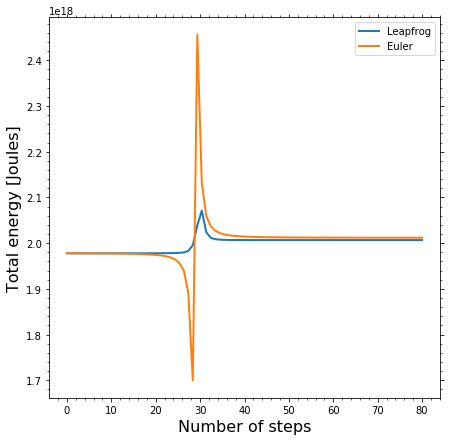

<Figure size 432x288 with 0 Axes>

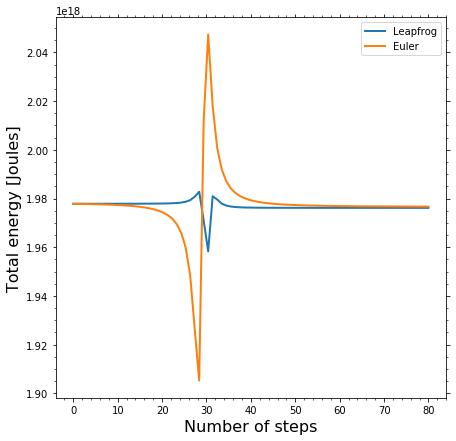

<Figure size 432x288 with 0 Axes>

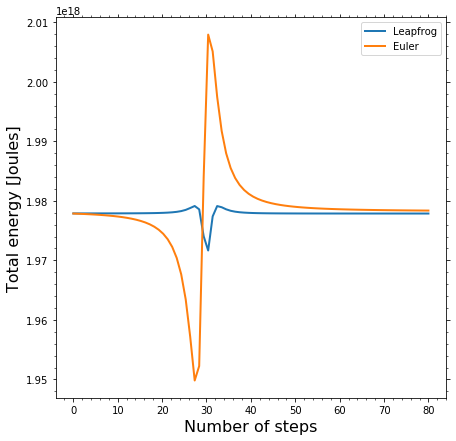

<Figure size 432x288 with 0 Axes>

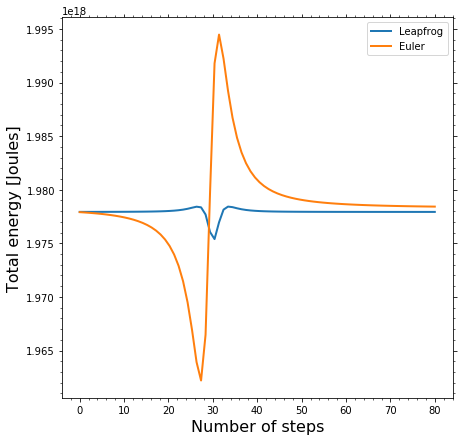

<Figure size 432x288 with 0 Axes>

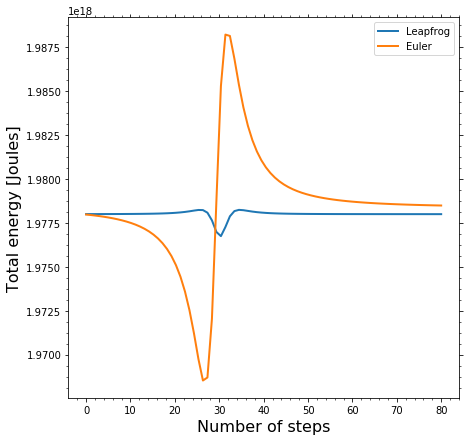

<Figure size 432x288 with 0 Axes>

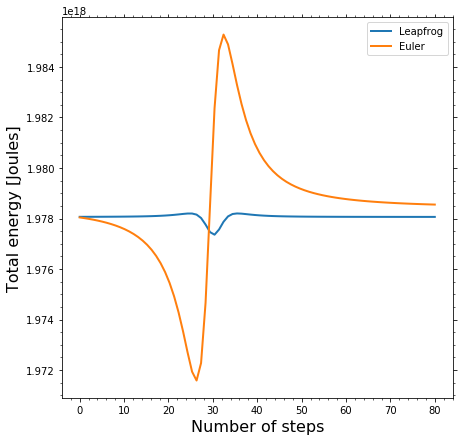

<Figure size 432x288 with 0 Axes>

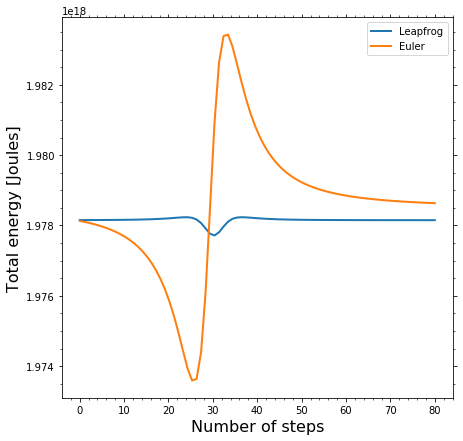

<Figure size 432x288 with 0 Axes>

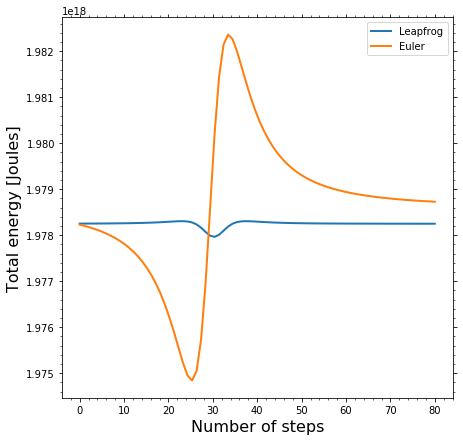

<Figure size 432x288 with 0 Axes>

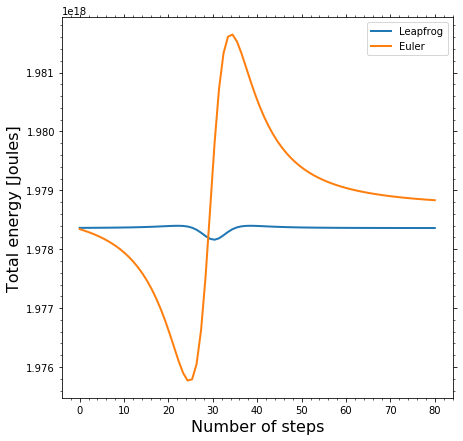

<Figure size 432x288 with 0 Axes>

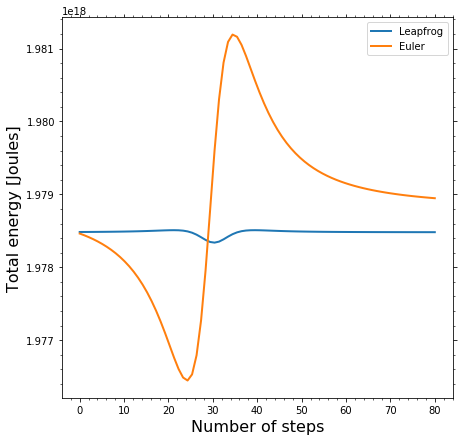

In [405]:
#Testing out how the total energy behaves for one particle 
for i in range(p):
    plt.figure()

    fig, ax = plt.subplots(figsize=[7,7])
    y_axis=np.linspace(0,80,80)
    #ax.plot(y_axis,(Xpos[0]**2+Ypos[0]**2),color='red')
    ax.plot(y_axis,TotalE_L(Xpos,Ypos,Xvel,Yvel)[i], lw=2, label='Leapfrog')
    ax.set_xlabel('Number of steps',fontsize=16)
    ax.set_ylabel('Total energy [Joules]', fontsize=16)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

    ax.plot(y_axis,TotalE_E(Xpos_e,Ypos_e,Xvel_e,Yvel_e)[i], lw=2, label='Euler')
    ax.set_xlabel('Number of steps',fontsize=16)
    ax.set_ylabel('Total energy [Joules]', fontsize=16)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

    ax.legend()

In [ ]:
#  ax[0].scatter(y_axis,(np.sqrt(Xpos[i]**2+Ypos[i]**2)),color='red',s=5,label='leapfrog')
    ax[0].set_ylabel('Particle Distance r [m]',fontsize=13)
    ax[0].tick_params(which='both', direction='in',width=1)
    ax[0].yaxis.set_minor_locator(AutoMinorLocator())
    ax[0].xaxis.set_minor_locator(AutoMinorLocator())        
    ax[0].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both');

<Figure size 432x288 with 0 Axes>

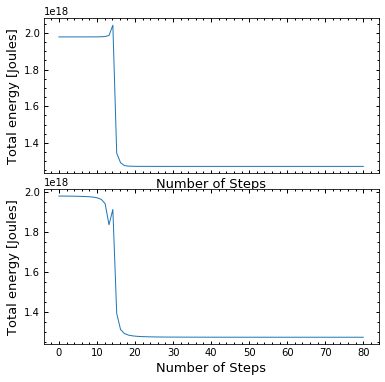

<Figure size 432x288 with 0 Axes>

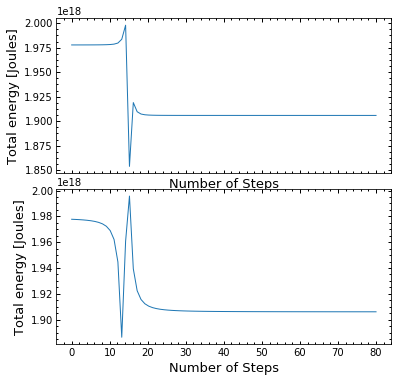

<Figure size 432x288 with 0 Axes>

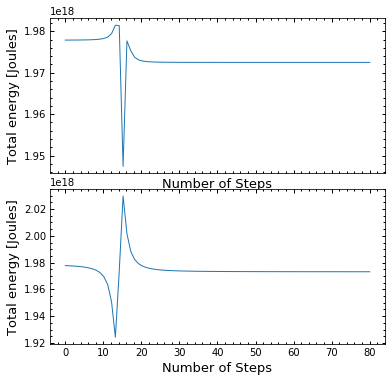

<Figure size 432x288 with 0 Axes>

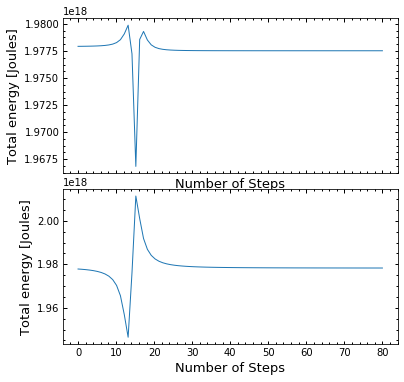

<Figure size 432x288 with 0 Axes>

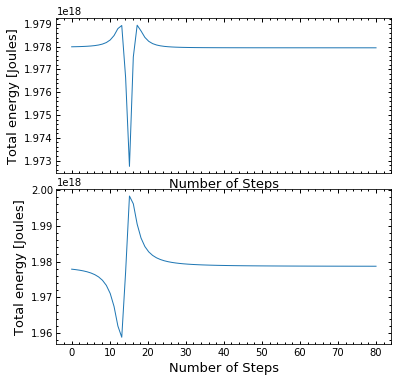

<Figure size 432x288 with 0 Axes>

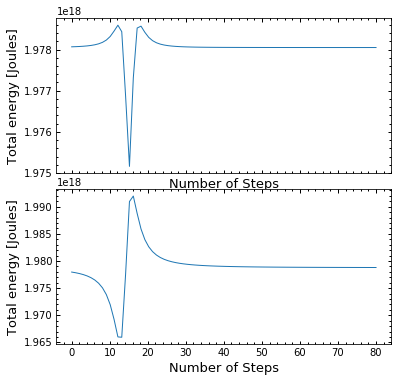

<Figure size 432x288 with 0 Axes>

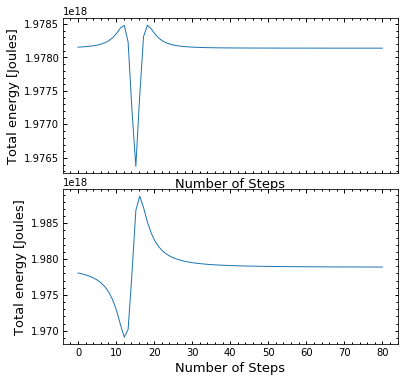

<Figure size 432x288 with 0 Axes>

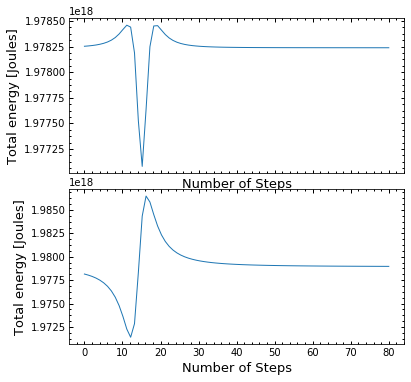

<Figure size 432x288 with 0 Axes>

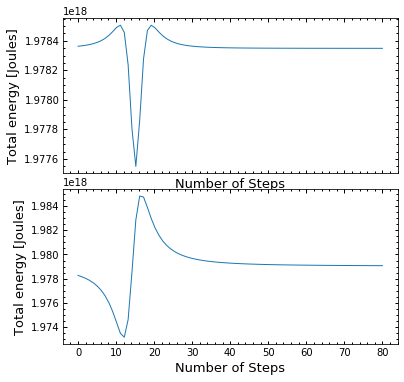

<Figure size 432x288 with 0 Axes>

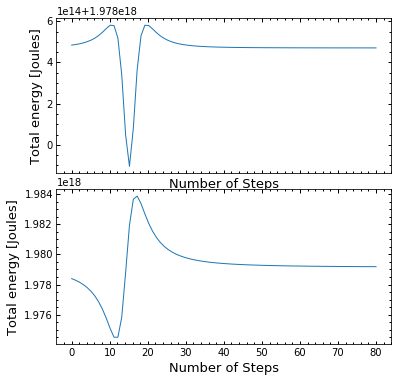

In [384]:

for i in range(p):
    plt.figure()
    y_axis=np.linspace(0,80,80)
    fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True)
  
    
    ax[0].plot(y_axis,TotalE_L(Xpos,Ypos,Xvel,Yvel)[i], lw=1,label='leapfrog')
    ax[0].set_xlabel('Number of Steps',fontsize=13)
    ax[0].set_ylabel('Total energy [Joules]', fontsize=13)
    ax[0].tick_params(which='both', direction='in',width=1)
    ax[0].yaxis.set_minor_locator(AutoMinorLocator())
    ax[0].xaxis.set_minor_locator(AutoMinorLocator())        
    ax[0].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    plt.subplots_adjust(hspace=0.1);
    
    ax[1].plot(y_axis,TotalE_E(Xpos_e,Ypos_e,Xvel_e,Yvel_e)[i], lw=1,label='Euler')
    ax[1].set_xlabel('Number of Steps',fontsize=13)
    ax[1].set_ylabel('Total energy [Joules]', fontsize=13)
    ax[1].tick_params(which='both', direction='in',width=1)
    ax[1].yaxis.set_minor_locator(AutoMinorLocator())
    ax[1].xaxis.set_minor_locator(AutoMinorLocator())        
    ax[1].yaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
    plt.subplots_adjust(hspace=0.1)

    